In [ ]:
%conda install pytorch torchvision -c pytorch
%conda install -c fastai fastai

In [ ]:
from fastai.vision.all import *
from fastcore.all import *

## Cat v Dog Example

### Label dataset

In [ ]:
path = untar_data(URLs.PETS)
file_names = get_image_files(path/'images')

def label_func(filename):
    return "cat" if filename.name[0].isupper() else "dog"

dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224))

dls = dblock.dataloaders(path/"images")
dls.show_batch()

### Retraining resnet34 on new labeled dataset

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

### Test the performance of retrained model

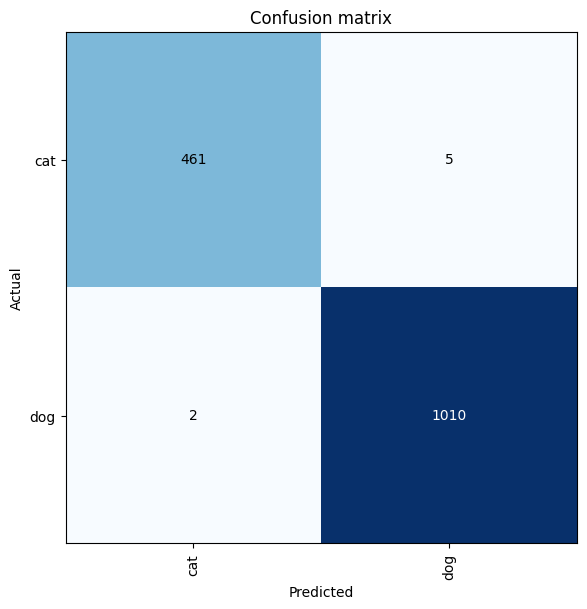

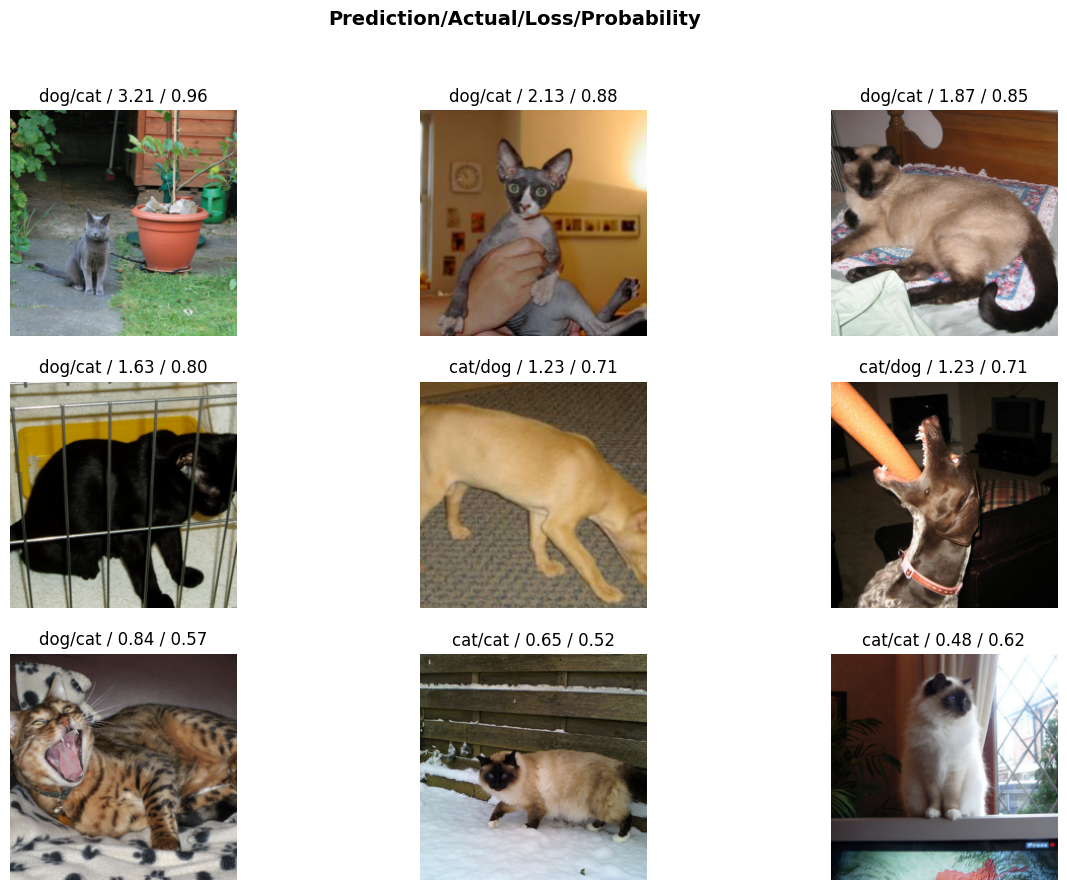

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
img = PILImage.create(file_names[9])

prediction,_,probs = learn.predict(img)

print(f"Predicted animal: {prediction}.")
print(f"Probability it is this animal: {probs[1].item():.6f}")
img.to_thumb(192)

## Retrain for Chest CT scans

### Label and load images into datablock

### Test the accuracy of stock imagenet model

### Retrain model on new data set

### Test the accuracy of retrained model